PREDICTIVE MOTOR CONTROL DEMONSTRATION

PHYSIOLOGICAL PARAMETERS:
• Nerve conduction speed: 60 m/s
• Hand distance: 0.8 m → 13.3 ms
• Foot distance: 1.2 m → 20.0 ms
• Time difference: 6.7 ms

KEY FINDING FROM EXPERIMENT:
• People naturally tap with foot 6.7ms BEFORE hand
• This creates SIMULTANEOUS perception at the brain
• The brain uses PREDICTIVE CONTROL to compensate for nerve delays

CONTROL STRATEGY COMPARISON:
NAIVE APPROACH:
  • Motor: Hand=0ms, Foot=0ms
  • Sensory: Hand=13.3ms, Foot=20.0ms
  • Result: 6.7ms asynchrony
PREDICTIVE APPROACH:
  • Motor: Hand=6.7ms, Foot=0ms
  • Sensory: Hand=20.0ms, Foot=20.0ms
  • Result: 0.0ms asynchrony

CONCLUSION:
The brain uses an INTERNAL MODEL to predict sensory consequences
and staggers motor commands to achieve perceptual simultaneity.


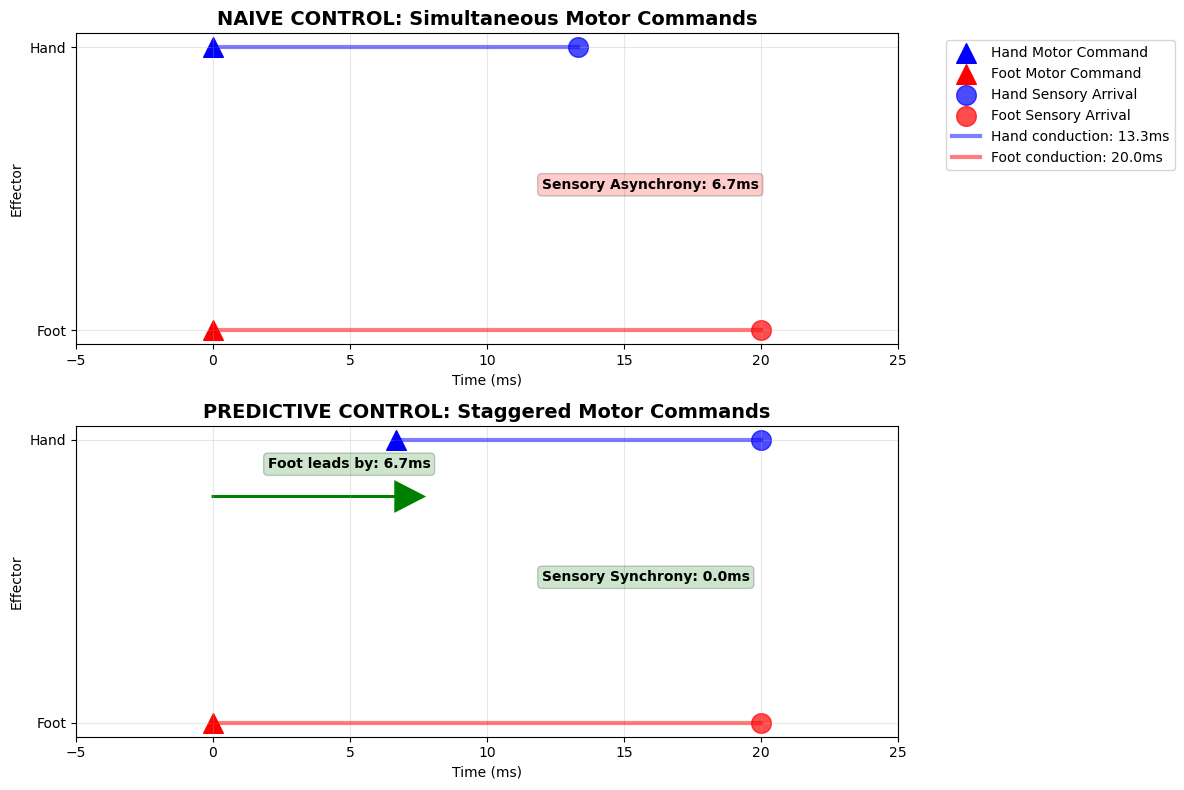

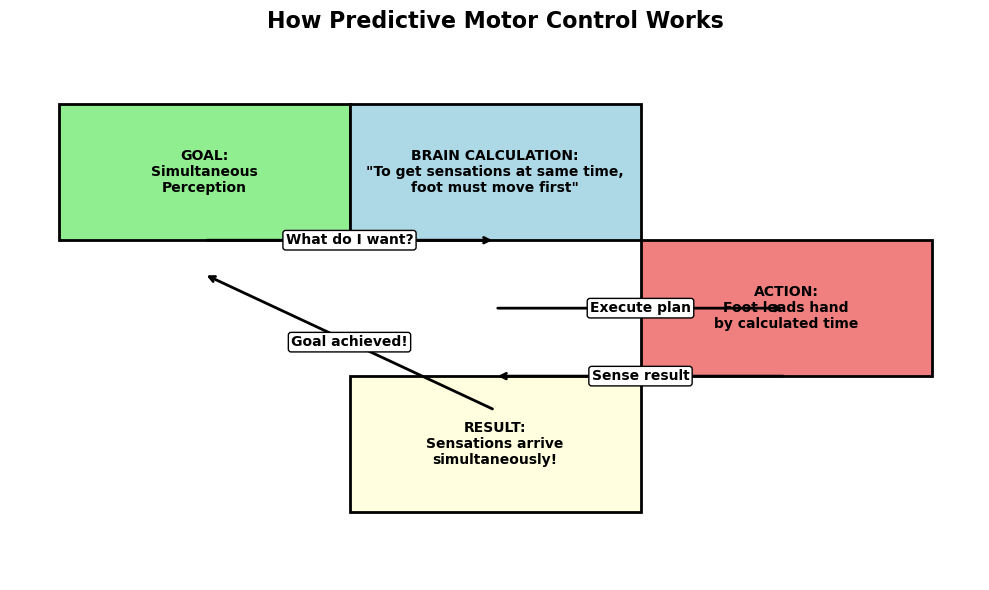

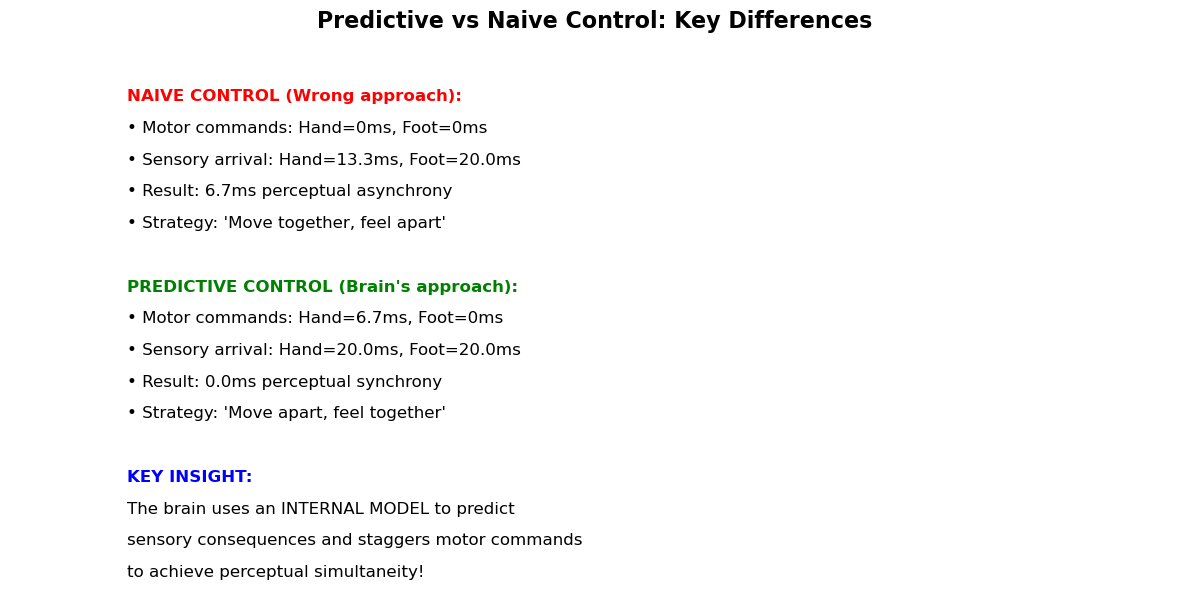

In [5]:
# Human Motor Control: Neural Timing Compensation in Sensorimotor Integration
# Mehdi Delrobaei - Oct. 2025

import numpy as np
import matplotlib.pyplot as plt

class PredictiveMotorControl:
    def __init__(self):
        # Physiological parameters
        self.conduction_speed = 60  # m/s
        self.hand_distance = 0.8    # m
        self.foot_distance = 1.2    # m
        
        # Calculate conduction times
        self.hand_conduction_time = (self.hand_distance / self.conduction_speed) * 1000
        self.foot_conduction_time = (self.foot_distance / self.conduction_speed) * 1000
        self.time_difference = self.foot_conduction_time - self.hand_conduction_time
    
    def run_simulations(self):
        """Run both naive and predictive simulations"""
        # Naive approach - simultaneous motor commands
        naive_results = {
            'motor_times': {'hand': 0, 'foot': 0},
            'sensory_times': {
                'hand': self.hand_conduction_time,
                'foot': self.foot_conduction_time
            }
        }
        
        # Predictive approach - staggered motor commands
        predictive_results = {
            'motor_times': {'hand': self.time_difference, 'foot': 0},
            'sensory_times': {
                'hand': self.hand_conduction_time + self.time_difference,
                'foot': self.foot_conduction_time
            }
        }
        
        return naive_results, predictive_results

def create_clean_timing_diagram():
    """Create a clear timing diagram comparing strategies"""
    pmc = PredictiveMotorControl()
    naive, predictive = pmc.run_simulations()
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Plot 1: Naive Control
    ax1.set_title('NAIVE CONTROL: Simultaneous Motor Commands', fontweight='bold', fontsize=14)
    
    # Motor commands
    ax1.scatter(naive['motor_times']['hand'], 2, color='blue', s=200, marker='^', label='Hand Motor Command')
    ax1.scatter(naive['motor_times']['foot'], 1, color='red', s=200, marker='^', label='Foot Motor Command')
    
    # Sensory feedback
    ax1.scatter(naive['sensory_times']['hand'], 2, color='blue', s=200, marker='o', 
                alpha=0.7, label='Hand Sensory Arrival')
    ax1.scatter(naive['sensory_times']['foot'], 1, color='red', s=200, marker='o', 
                alpha=0.7, label='Foot Sensory Arrival')
    
    # Draw conduction lines
    ax1.plot([naive['motor_times']['hand'], naive['sensory_times']['hand']], [2, 2], 
             'blue', linewidth=3, alpha=0.5, label=f'Hand conduction: {pmc.hand_conduction_time:.1f}ms')
    ax1.plot([naive['motor_times']['foot'], naive['sensory_times']['foot']], [1, 1], 
             'red', linewidth=3, alpha=0.5, label=f'Foot conduction: {pmc.foot_conduction_time:.1f}ms')
    
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Effector')
    ax1.set_yticks([1, 2])
    ax1.set_yticklabels(['Foot', 'Hand'])
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(-5, 25)
    
    sensory_diff_naive = abs(naive['sensory_times']['hand'] - naive['sensory_times']['foot'])
    ax1.text(12, 1.5, f'Sensory Asynchrony: {sensory_diff_naive:.1f}ms', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='red', alpha=0.2),
             fontweight='bold')
    
    # Plot 2: Predictive Control
    ax2.set_title('PREDICTIVE CONTROL: Staggered Motor Commands', fontweight='bold', fontsize=14)
    
    # Motor commands
    ax2.scatter(predictive['motor_times']['hand'], 2, color='blue', s=200, marker='^')
    ax2.scatter(predictive['motor_times']['foot'], 1, color='red', s=200, marker='^')
    
    # Sensory feedback
    ax2.scatter(predictive['sensory_times']['hand'], 2, color='blue', s=200, marker='o', alpha=0.7)
    ax2.scatter(predictive['sensory_times']['foot'], 1, color='red', s=200, marker='o', alpha=0.7)
    
    # Draw conduction lines
    ax2.plot([predictive['motor_times']['hand'], predictive['sensory_times']['hand']], [2, 2], 
             'blue', linewidth=3, alpha=0.5)
    ax2.plot([predictive['motor_times']['foot'], predictive['sensory_times']['foot']], [1, 1], 
             'red', linewidth=3, alpha=0.5)
    
    # Highlight the compensation
    ax2.arrow(predictive['motor_times']['foot'], 1.8, predictive['motor_times']['hand'] - predictive['motor_times']['foot'], 0,
              head_width=0.1, head_length=1, fc='green', ec='green', linewidth=2)
    ax2.text(predictive['motor_times']['foot'] + 2, 1.9, f'Foot leads by: {pmc.time_difference:.1f}ms',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.2),
             fontweight='bold')
    
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Effector')
    ax2.set_yticks([1, 2])
    ax2.set_yticklabels(['Foot', 'Hand'])
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(-5, 25)
    
    sensory_diff_predictive = abs(predictive['sensory_times']['hand'] - predictive['sensory_times']['foot'])
    ax2.text(12, 1.5, f'Sensory Synchrony: {sensory_diff_predictive:.1f}ms', 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='green', alpha=0.2),
             fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def create_simple_control_diagram():
    """Create a simple, clear control system diagram"""
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    ax.axis('off')
    ax.set_title('How Predictive Motor Control Works', fontweight='bold', fontsize=16)
    
    # Simple block diagram
    blocks = [
        (2, 6, 'GOAL:\nSimultaneous\nPerception', 'lightgreen'),
        (5, 6, 'BRAIN CALCULATION:\n"To get sensations at same time,\nfoot must move first"', 'lightblue'),
        (8, 4, 'ACTION:\nFoot leads hand\nby calculated time', 'lightcoral'),
        (5, 2, 'RESULT:\nSensations arrive\nsimultaneously!', 'lightyellow')
    ]
    
    for x, y, text, color in blocks:
        rect = plt.Rectangle((x-1.5, y-1), 3, 2, facecolor=color, edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y, text, ha='center', va='center', fontweight='bold', fontsize=10)
    
    # Simple arrows
    arrows = [
        ((2, 5), (5, 5), 'What do I want?'),
        ((5, 4), (8, 4), 'Execute plan'),
        ((8, 3), (5, 3), 'Sense result'),
        ((5, 2.5), (2, 4.5), 'Goal achieved!')
    ]
    
    for (x1, y1), (x2, y2), label in arrows:
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                   arrowprops=dict(arrowstyle='->', lw=2, color='black'))
        ax.text((x1+x2)/2, (y1+y2)/2, label, ha='center', va='center', 
                bbox=dict(boxstyle="round,pad=0.2", facecolor='white'),
                fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def create_simple_comparison():
    """Create a simple comparison without complex table"""
    pmc = PredictiveMotorControl()
    naive, predictive = pmc.run_simulations()
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.axis('off')
    ax.set_title('Predictive vs Naive Control: Key Differences', fontweight='bold', fontsize=16)
    
    # Simple text comparison
    comparison_text = [
        "NAIVE CONTROL (Wrong approach):",
        "• Motor commands: Hand=0ms, Foot=0ms",
        "• Sensory arrival: Hand=13.3ms, Foot=20.0ms", 
        "• Result: 6.7ms perceptual asynchrony",
        "• Strategy: 'Move together, feel apart'",
        "",
        "PREDICTIVE CONTROL (Brain's approach):",
        "• Motor commands: Hand=6.7ms, Foot=0ms",
        "• Sensory arrival: Hand=20.0ms, Foot=20.0ms",
        "• Result: 0.0ms perceptual synchrony", 
        "• Strategy: 'Move apart, feel together'",
        "",
        "KEY INSIGHT:",
        "The brain uses an INTERNAL MODEL to predict",
        "sensory consequences and staggers motor commands",
        "to achieve perceptual simultaneity!"
    ]
    
    for i, line in enumerate(comparison_text):
        y_pos = 0.9 - (i * 0.06)
        color = 'black'
        weight = 'normal'
        
        if "NAIVE" in line:
            color = 'red'
            weight = 'bold'
        elif "PREDICTIVE" in line:
            color = 'green' 
            weight = 'bold'
        elif "KEY INSIGHT" in line:
            color = 'blue'
            weight = 'bold'
            
        ax.text(0.1, y_pos, line, transform=ax.transAxes, fontsize=12,
                color=color, fontweight=weight, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Run the demonstrations
print("PREDICTIVE MOTOR CONTROL DEMONSTRATION")
print("=" * 50)

pmc = PredictiveMotorControl()
naive, predictive = pmc.run_simulations()

print(f"\nPHYSIOLOGICAL PARAMETERS:")
print(f"• Nerve conduction speed: {pmc.conduction_speed} m/s")
print(f"• Hand distance: {pmc.hand_distance} m → {pmc.hand_conduction_time:.1f} ms")
print(f"• Foot distance: {pmc.foot_distance} m → {pmc.foot_conduction_time:.1f} ms")
print(f"• Time difference: {pmc.time_difference:.1f} ms")

print(f"\nKEY FINDING FROM EXPERIMENT:")
print(f"• People naturally tap with foot {pmc.time_difference:.1f}ms BEFORE hand")
print(f"• This creates SIMULTANEOUS perception at the brain")
print(f"• The brain uses PREDICTIVE CONTROL to compensate for nerve delays")

print(f"\nCONTROL STRATEGY COMPARISON:")
print(f"NAIVE APPROACH:")
print(f"  • Motor: Hand=0ms, Foot=0ms")
print(f"  • Sensory: Hand={naive['sensory_times']['hand']:.1f}ms, Foot={naive['sensory_times']['foot']:.1f}ms") 
print(f"  • Result: {abs(naive['sensory_times']['hand'] - naive['sensory_times']['foot']):.1f}ms asynchrony")

print(f"PREDICTIVE APPROACH:")
print(f"  • Motor: Hand={predictive['motor_times']['hand']:.1f}ms, Foot=0ms")  
print(f"  • Sensory: Hand={predictive['sensory_times']['hand']:.1f}ms, Foot={predictive['sensory_times']['foot']:.1f}ms")
print(f"  • Result: {abs(predictive['sensory_times']['hand'] - predictive['sensory_times']['foot']):.1f}ms asynchrony")

print(f"\nCONCLUSION:")
print(f"The brain uses an INTERNAL MODEL to predict sensory consequences")
print(f"and staggers motor commands to achieve perceptual simultaneity.")

# Create the clean visualizations
create_clean_timing_diagram()
create_simple_control_diagram() 
create_simple_comparison()